In [117]:
%run "Retropy_framework.ipynb"

Installing requirements ..
Done


In [7]:
from pyfinance import *
>>> s = np.random.randn(400) / 100 + 0.0008
>>> idx = pd.date_range(start='2016', periods=len(s))  # default daily freq.
>>> ts = TSeries(s, index=idx)
ts

2016-01-01    0.01
2016-01-02    0.01
2016-01-03    0.02
2016-01-04    0.01
2016-01-05   -0.00
2016-01-06   -0.02
2016-01-07    0.00
2016-01-08   -0.00
2016-01-09    0.02
2016-01-10    0.01
2016-01-11   -0.01
2016-01-12   -0.02
2016-01-13    0.01
2016-01-14    0.01
2016-01-15    0.02
2016-01-16    0.01
2016-01-17   -0.01
2016-01-18   -0.01
2016-01-19    0.00
2016-01-20    0.01
2016-01-21    0.02
2016-01-22    0.01
2016-01-23    0.00
2016-01-24   -0.00
2016-01-25    0.01
2016-01-26   -0.01
2016-01-27   -0.01
2016-01-28   -0.00
2016-01-29   -0.00
2016-01-30    0.01
2016-01-31   -0.01
2016-02-01   -0.01
2016-02-02    0.01
2016-02-03   -0.00
2016-02-04    0.00
2016-02-05   -0.01
2016-02-06   -0.00
2016-02-07    0.00
2016-02-08    0.00
2016-02-09    0.02
2016-02-10   -0.00
2016-02-11   -0.01
2016-02-12   -0.00
2016-02-13   -0.00
2016-02-14   -0.01
2016-02-15   -0.01
2016-02-16   -0.01
2016-02-17   -0.01
2016-02-18    0.01
2016-02-19    0.01
2016-02-20    0.01
2016-02-21   -0.01
2016-02-22  

In [9]:
>>> from pandas_datareader import DataReader

>>> syms = {
...     'TWEXBMTH': 'usd',
...     'T10Y2YM': 'term_spread',
...     'PCOPPUSDM': 'copper'
...     }

>>> data = DataReader(syms.keys(), data_source='fred',
...                   start='2000-01-01', end='2016-12-31')\
...     .pct_change()\
...     .dropna()\
...     .rename(columns=syms)

>>> y = data.pop('usd')

>>> data.head()

>>> y.head()


term_spread  copper
DATE                           
2000-02-01        -1.41   -0.02
2000-03-01         2.00   -0.04
2000-04-01         0.52   -0.03
2000-05-01        -0.10    0.06
2000-06-01         0.03   -0.02

DATE
2000-02-01    0.01
2000-03-01   -0.00
2000-04-01    0.01
2000-05-01    0.02
2000-06-01   -0.01
Freq: MS, Name: usd, dtype: float64

In [10]:
>>> from pyfinance import ols

>>> model = ols.OLS(y=y, x=data)

>>> model.alpha  # the intercept - a scalar

>>> model.beta  # the coefficients

>>> model.fstat

# Residuals and predicted y values are NumPy arrays
# with the same shape as `y`.
>>> model.resids.shape

>>> model.predicted.shape


Fetching OLS from AV .. Failed to fetch OLS from AV, trying from Y .. Fetching OLS from Y .. Failed to fetch implied symbol: OLS


0.001230320443416746

array([-0.00062647, -0.09490566])

33.42923069295481

(203,)

(203,)

365.0

In [233]:
def show_rolling_beta(target, sources, window=None, rsq=True, betaSum=False, pvalue=False, freq=None):
    if not isinstance(sources, list):
        sources = [sources]
        
    target = get(target)
    sources = get(sources)
    names = [s.name for s in sources]
    
    target = logret(target)
    sources = lmap(logret, sources)
    
    target = unwrap(target)
    sources = lmap(unwrap, sources)
    
    sources = pd.DataFrame(sources).T.dropna()

    target, sources = sync(target, sources)
    
    if freq:
        target = target.asfreq(freq)
        sources = sources.asfreq(freq)
        if window is None:
            window = int(get_anlz_factor(freq))
    else:
        if window is None:
            window = 365
    
    rolling = ols.PandasRollingOLS(y=target, x=sources, window=window)
    #rolling.beta.head()
    #rolling.alpha.head()
    #rolling.pvalue_alpha.head()
    #type(rolling.beta["feature1"])
    
    
    res = []
    
    if pvalue:
        _pvalue = rolling.pvalue_beta
        _pvalue.columns = [s + " pvalue" for s in names]
        res += [_pvalue, 0.05]
    
    if rsq:
        rsq = rolling.rsq
        rsq.name = "R^2"
        res += [rsq]

    _beta = rolling.beta
    _beta.columns = [s + " beta" for s in names]
    res += [_beta]
        
    if betaSum and len(names) > 1:
        _betaSum = rolling.beta.sum(axis=1)
        _betaSum.name = "beta sum"
        res += [_betaSum]
        
    res += [-1, 0, 1]
    
    show(res, ta=False)
        
#show_rolling_beta(PERM, [lc, gold, lgb], pvalue=False)
#show_rolling_beta(VT, [VTI, VXUS])
#show_rolling_beta(SVXY, ZIV, window=60, pvalue=True)
show_rolling_beta(NEAR, MINT, freq="M")
#show(NEAR, MINT)

show(logret(NEAR.asfreq("M")) / logret(MINT.asfreq("M")), ta=False)

(-0.002, 0.005)

(-0.002, 0.005)

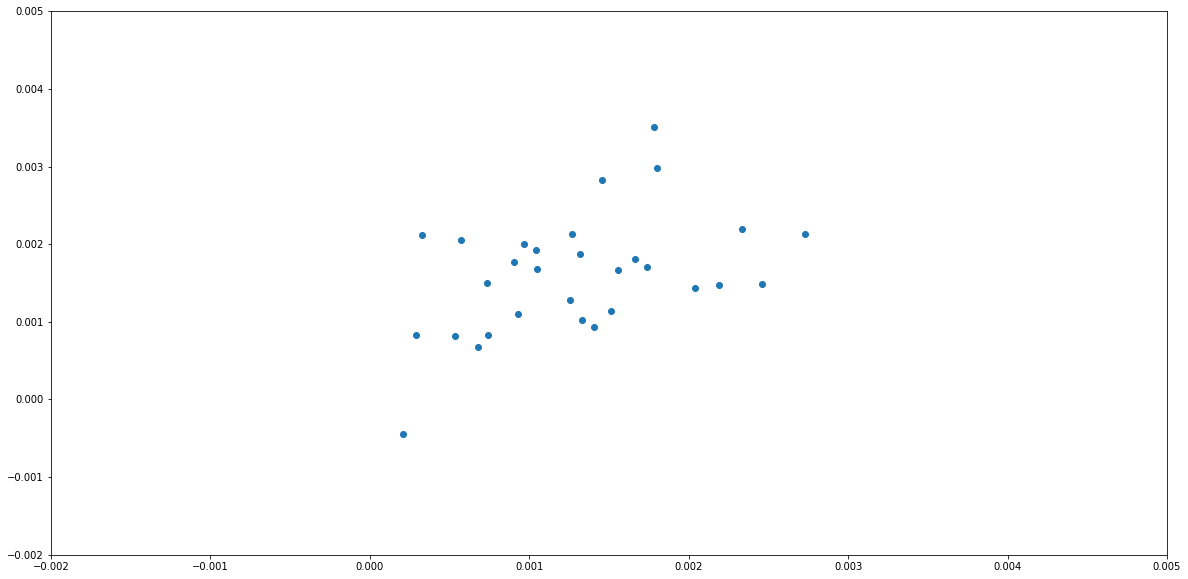

In [232]:
plt.scatter(*sync(logret(NEAR.asfreq("M")), logret(MINT.asfreq("M"))))
plt.xlim(-0.002, 0.005)
plt.ylim(-0.002, 0.005)
#MINT.asfreq("M")

In [ ]:
# be sure to save before you publish
# when done, you will get a public link to an HTML file with the results
publish()